In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combined = [train, test]
clean = train.drop(columns=["PassengerId", "Survived"])


# Charts and Historgrams Visualization Tools
import matplotlib.pyplot as plt
%matplotlib inline
# Setting seaborn default for plots
import seaborn as sns
sns.set() 

# Helpers to display Information
from IPython.display import display_html
def display2str(col1, col2):
    display_html(f"<table><tr><td>TRAIN:<pre>{col1}</pre></td>" +
                 f"<td>TEST:<pre>{col2}</pre></td></tr></table>", raw=True)
def display2frames(df1, df2):
    display_html(f"<table><tr><td><pre>{df1}</pre></td>" +
                 f"<td><pre>{df2}</pre></td></tr></table>", raw=True)    
    

## Data Example

In [2]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data Dictionary

**Target Function:**
<li>Survived: 0 = No, 1 = Yes
    
**Given Fields:**
<li>pclass: Ticket class 1 = 1st, 2 =2nd, 3 = 3rd
<li>sibsp: # of siblings / spouses aboard the Titanic
<li>parch: # of parents / children aboard the Titanic
<li>ticket: Ticket number
<li>cabin: Cabin number
<li>embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Do we have good distribution for our numeric features?

In [3]:
display2str(train.shape, test.shape)

"TRAIN:(891, 12)","TEST:(418, 11)"


In [4]:
clean.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Lets visualize how our numerical features are distributed on both train and test subsets.

If it had different distribution, it should be excluded from training.

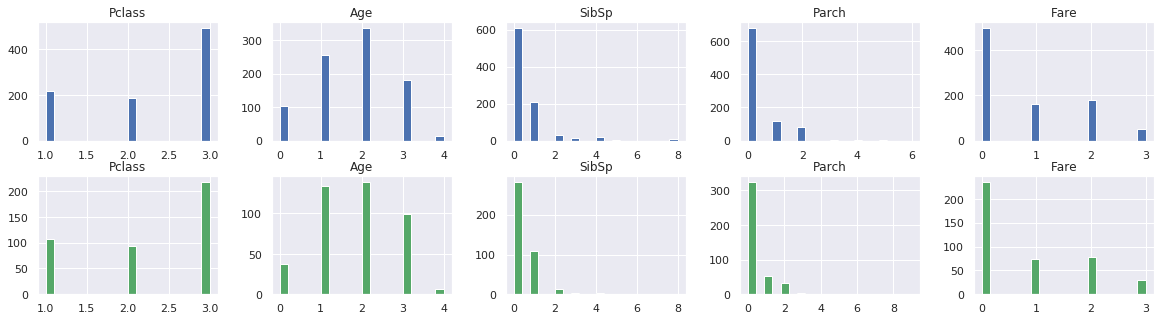

In [34]:
def histograms(features):
    ncols = len(features)
    plt.close("all")
    fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(20,5))
    xi = 0
    for feature in features:
        df1 = pd.DataFrame(train[feature])
        df2 = pd.DataFrame(test[feature])
        df1.hist(ax = axes[0, xi], color = 'b', bins=20)
        df2.hist(ax = axes[1, xi], color = 'g', bins=20)
        xi += 1
        
histograms(["Pclass", "Age", "SibSp", "Parch", "Fare" ])

It seems that these 5 features can be trusted for the training, as test dataset represents them with almost the same distribution

## Missing Data Discovery

In [6]:
def w_null(data):
    series_w_null = data.isnull().sum().sort_index()
    return series_w_null.iloc[series_w_null.nonzero()[0]]

display2frames(w_null(train).to_frame("TRAIN"), w_null(test).to_frame("TEST"))

TRAIN Age 177 Cabin 687 Embarked 2,TEST Age 86 Cabin 327 Fare 1


## Exploring Categorical Features

In [7]:
def bar_charts(features):
    ncols = len(features)
    plt.close("all")
    fig, axes = plt.subplots(nrows=1, ncols=ncols)
    xi = 0
    for feature in features:
        survived = train[train['Survived']==1][feature].value_counts()
        dead = train[train['Survived']==0][feature].value_counts()
        df = pd.DataFrame([survived,dead])
        df.index = ['Survived','Dead']
        df.plot(ax = axes[xi], kind='bar', stacked=True, figsize=(20,5), title=feature)
        xi += 1

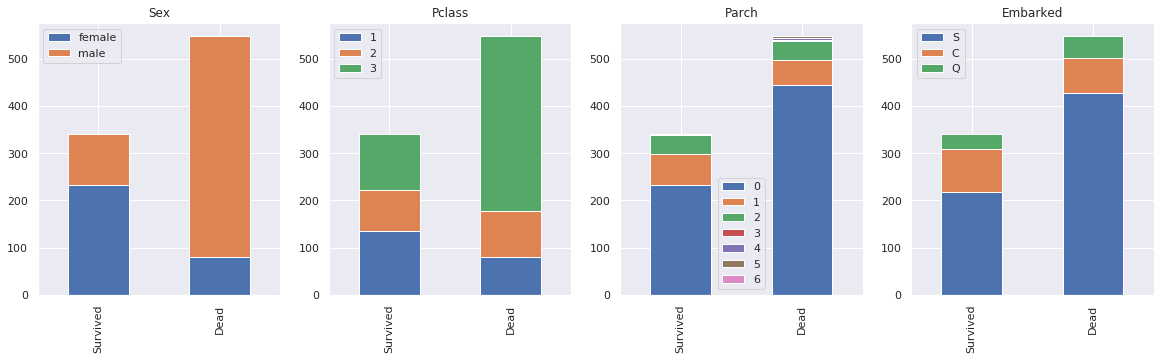

In [8]:
bar_charts(['Sex', 'Pclass', 'Parch', 'Embarked'])

## Feature Engineering

### Title

In [9]:
for dataset in combined:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Capt          1
Jonkheer      1
Countess      1
Sir           1
Don           1
Lady          1
Mme           1
Name: Title, dtype: int64

In [10]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in combined:
    dataset['TitleCode'] = dataset['Title'].map(title_mapping)

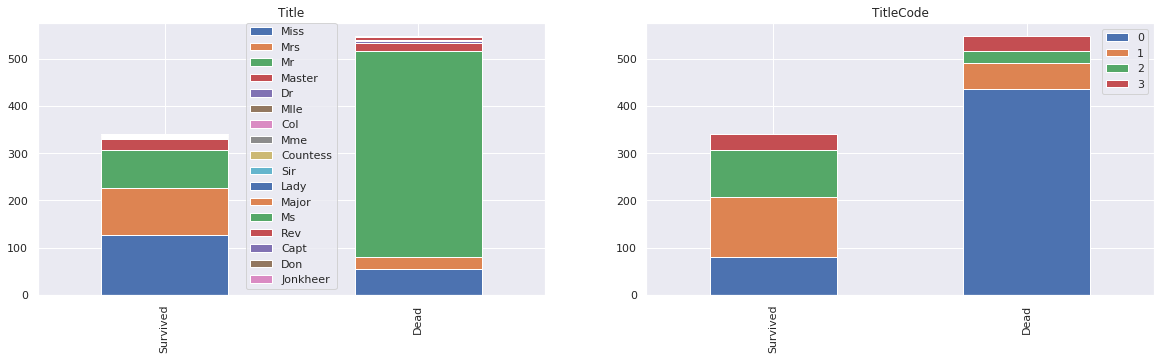

In [11]:
bar_charts(['Title', 'TitleCode'])

In [12]:
dataset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleCode
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


In [13]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

## Age

In [14]:
sex_mapping = {"male": 0, "female": 1}
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

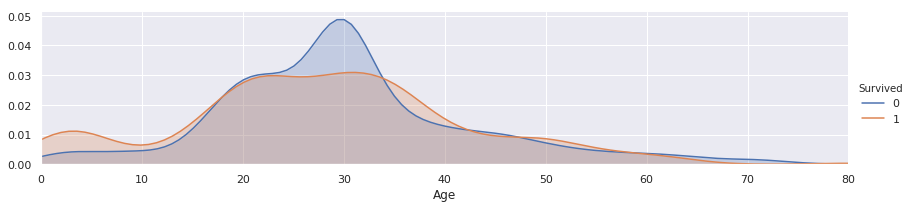

In [15]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.groupby("Title")["Age"].transform("median")

# Visualize Distribution
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [16]:
for dataset in combined:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

## Embarked

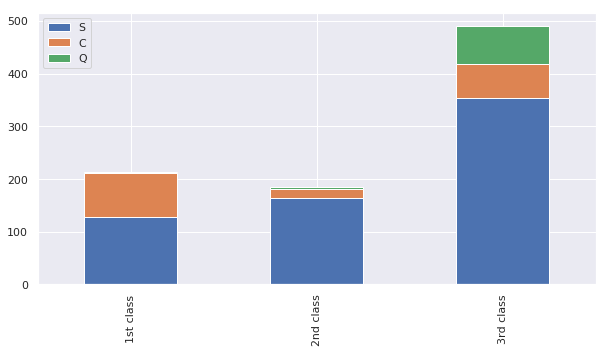

In [17]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [18]:
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare

In [19]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [20]:
for dataset in combined:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

## Cabin

In [21]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
E101           3
C22 C26        3
D              3
F2             3
E33            2
C52            2
C2             2
E24            2
E44            2
C65            2
D35            2
B5             2
C124           2
C68            2
E8             2
C83            2
B58 B60        2
B35            2
C93            2
B20            2
C125           2
B18            2
B22            2
E67            2
D26            2
D36            2
              ..
D37            1
B37            1
B82 B84        1
D21            1
E58            1
B101           1
D19            1
B71            1
B30            1
A7             1
E31            1
D10 D12        1
C110           1
B41            1
E46            1
D30            1
D47            1
C111           1
D45            1
C86            1
D11            1
E63            1
D46            1
C106           1
C62 C64        1
B86            1
C54            1
C103          

In [22]:
for dataset in combined:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

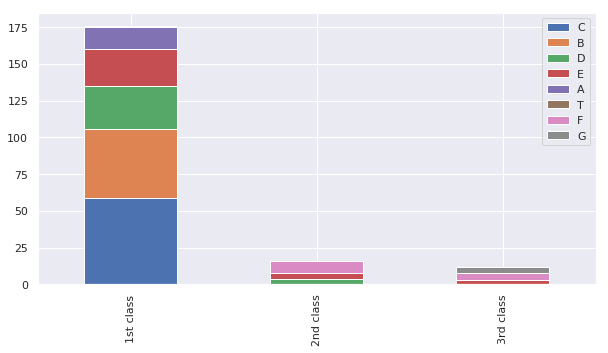

In [23]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [24]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in combined:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [25]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [26]:
display2frames(train['Title'].value_counts(), test['Title'].value_counts())

"Mr 517 Miss 182 Mrs 125 Master 40 Dr 7 Rev 6 Mlle 2 Col 2 Major 2 Ms 1 Capt 1 Jonkheer 1 Countess 1 Sir 1 Don 1 Lady 1 Mme 1 Name: Title, dtype: int64","Mr 240 Miss 78 Mrs 72 Master 21 Rev 2 Col 2 Dona 1 Dr 1 Ms 1 Name: Title, dtype: int64"
